# SyriaTel Communications Project: Customer Churn (Binary Classification)

### Table of Contents

1. Introduction + Cleaning + EDA: Exploration of the data without intensive technologies. 
2. Modeling the Data
3. Question One
4. Question Two
5. Question Three
6. Conclusion: The findings repeated in a concise summary.

### Strategic Approach

The stakeholder, SyriaTel, is a telecommunications company whose goal is to better understand what factors are causing customer churn. Due to limits on data size, the model will only be robust enough to be used by SyriaTel to analyze their specific data provided.

By exploring typical customer churn and using the CRISP-DM framework, I will seek to answer the following questions: 

1. What features of the dataset are primary determinants of customer churn and to what extent?

2. What are the ways that these findings can be interpreted and how can SyriaTel implement cost-effective solutions?

3. Will these solutions be feasible in reducing the customer churn rate by at least 7%?

In [ ]:
# SyriaTel Communications Project: Customer Churn (Binary Classification)

### Notebook Table of Contents

1. Introduction + Cleaning + EDA: Exploration of the data without intensive technologies. 
2. Modeling the Data
3. Question One
4. Question Two
5. Question Three
6. Conclusion: The findings repeated in a concise summary.

### Strategic Approach

The stakeholder, SyriaTel, is a telecommunications company whose goal is to better understand what factors are causing customer churn. Due to limits on data size, the model will only be robust enough to be used by SyriaTel to analyze their specific data provided.

By exploring typical customer churn and using the CRISP-DM framework, I will seek to answer the following questions: 

1. What features of the dataset are primary determinants of customer churn and to what extent?

2. What are the ways that these findings can be interpreted and how can SyriaTel implement cost-effective solutions?

3. Will these solutions be feasible in reducing the customer churn rate by at least 7%?

# Question Two

# What are the ways that these findings can be interpreted and how can SyriaTel implement cost-effective solutions?

The high number of minutes leading to customer churn in total day minutes and night minutes makes it obvious that customers who are using more minutes are having to pay more and therefore, looking elsewhere for more cost-effective solutions. Another concept to explore here is whether or not the customers have a contract or are simply paying month-to-month. 

In [1]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
import numpy as np

one_hot_df = pd.read_pickle("./one_hot_df.pkl")
one_hot_df.head(2)

,account_length,area_code,intl_plan,vmail_plan,qty_vmails,sum_day_mins,sum_day_calls,total_day_charge,sum_eve_mins,sum_eve_calls,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,128,415,0,1,25,265.1,110,45.07,197.4,99,...,0,0,0,0,0,0,0,0,0,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,...,0,0,0,0,0,0,0,0,0,0


### Average Day Minutes

Threshold of the mean, 179 will be used to signiify customers who use an above average amount of minutes. 

In [2]:
one_hot_df.sum_day_mins.describe()

count    3333.000000
mean      179.775098
std        54.467389
min         0.000000
25%       143.700000
50%       179.400000
75%       216.400000
max       350.800000
Name: sum_day_mins, dtype: float64

In [3]:
high_day_min = one_hot_df[one_hot_df['sum_day_mins'] >= 179]

In [4]:
high_day_min.shape

(1682, 69)

In [5]:
high_day_min.churn.value_counts()

0.0    1389
1.0     293
Name: churn, dtype: int64

In [6]:
high_day_mins = high_day_min[high_day_min['churn'] == 1]

In [7]:
high_day_mins.churn.value_counts()

1.0    293
Name: churn, dtype: int64

In [8]:
day_sum = high_day_mins.total_day_charge.sum()

In [9]:
night_sum = high_day_mins.total_night_charge.sum()

In [10]:
eve_sum = high_day_mins.total_eve_charge.sum()

In [11]:
intl_sum = high_day_mins.total_intl_charge.sum()

In [12]:
day_total_rev = day_sum + night_sum + eve_sum + intl_sum

In [13]:
day_total_rev

21862.31

### Churn Numbers

The current percentage of churn is at 14.49%. This means that each percentage point represents 33% of customers. To reduce churn to a reasonable about of around 7%, SyriaTel needs to retain 247 customers annually.

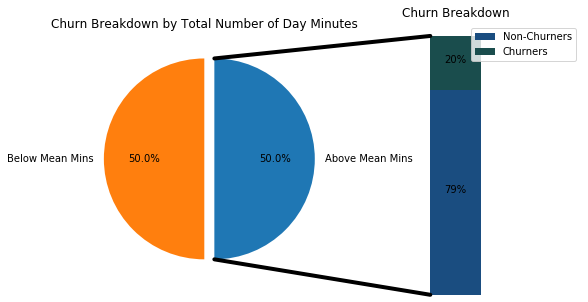

In [14]:
# make figure and assign axis objects
fig = plt.figure(figsize=(9, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
fig.subplots_adjust(wspace=0)

# pie chart parameters
ratios = [.50, .50]
labels = ['Above Mean Mins', 'Below Mean Mins']
explode = [0.1, 0]
# rotate so that first wedge is split by the x-axis
angle = -180 * ratios[0]
ax1.pie(ratios, autopct='%1.1f%%', startangle=angle,
        labels=labels, explode=explode)

# bar chart parameters

xpos = 0
bottom = 0
ratios = [.79, .21]
width = .2
colors = [[.1, .3, .5], [.1, .3, .3], [.1, .3, .7], [.1, .3, .9]]

for j in range(len(ratios)):
    height = ratios[j]
    ax2.bar(xpos, height, width, bottom=bottom, color=colors[j])
    ypos = bottom + ax2.patches[j].get_height() / 2
    bottom += height
    ax2.text(xpos, ypos, "%d%%" % (ax2.patches[j].get_height() * 100),
             ha='center')
ax1.set_title('Churn Breakdown by Total Number of Day Minutes')
ax2.set_title('Churn Breakdown')
ax2.legend(('Non-Churners', 'Churners'))
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)

# use ConnectionPatch to draw lines between the two plots
# get the wedge data
theta1, theta2 = ax1.patches[0].theta1, ax1.patches[0].theta2
center, r = ax1.patches[0].center, ax1.patches[0].r
bar_height = sum([item.get_height() for item in ax2.patches])

# top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(4)
ax2.add_artist(con)

# bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(4)

plt.show()

In [15]:
one_hot_df.churn.value_counts()

0.0    2850
1.0     483
Name: churn, dtype: int64

In [16]:
one_hot_df.churn.value_counts(normalize = True)

0.0    0.855086
1.0    0.144914
Name: churn, dtype: float64

# Conclusion

The customers with an above average number of day minutes have been linked to being likely to churn. There are 293 of them. SyriaTel needs to reduce churn by 247 customers annually. By offering customers plans with flat monthly fees, SyriaTel will be able to reduce this churn and potentially save over $25,000.

# Future Work

This is one of many proposed solutions for decreasing churn that are easily accessible. Future work into understanding SyriaTel's contracts with customers would further assist in determining why customer retention is lacking. 